In [1]:
rm(list=ls())
dir = '/Users/sungjinpark/OneDrive - konkuk.ac.kr/datamining/appstore_2/4randomforest_visualize'
setwd(dir)
getwd()
load('cls_3_train.rda')
load('cls_3_test.rda')

cls_1_train = cls_3_train
cls_1_test = cls_3_test
colnames(cls_1_train)[4] <- "Y"
colnames(cls_1_test)[4]<- "Y"

[1] "/Users/sungjinpark/OneDrive - konkuk.ac.kr/datamining/appstore_2/4randomforest_visualize"

In [2]:
##################################################################
# relevel categorical variables
##################################################################
cls_1_train <- droplevels(cls_1_train)    
cls_1_test <- droplevels(cls_1_test)


In [6]:
library(randomForest)
library(caret)
library(randomForestExplainer)
library(descr)
library(ggplot2)
library(scales)

# best tune model Result

In [7]:
set.seed(1)
tune_model1.fit=randomForest(Y~.,data=cls_1_train,ntree=120,mtry=7,nodesize=1,type='C',localImp = TRUE) #default = 1
pred=predict(tune_model1.fit,newdata=cls_1_test[,-4])
confusionMatrix(cls_1_test$Y, pred)


Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 201   3   3   0   0
         2   2  14  12   3   3
         3   0   4  49  43  11
         4   0   0  21 293 134
         5   0   2   6 112 518

Overall Statistics
                                          
               Accuracy : 0.7497          
                 95% CI : (0.7264, 0.7719)
    No Information Rate : 0.4644          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6261          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.9901 0.608696  0.53846   0.6497   0.7778
Specificity            0.9951 0.985826  0.95681   0.8423   0.8438
Pos Pred Value         0.9710 0.411765  0.45794   0.6540   0.8119
Neg Pred Value         0.9984 0.993571  0.96835   0.8398   0.8141
P

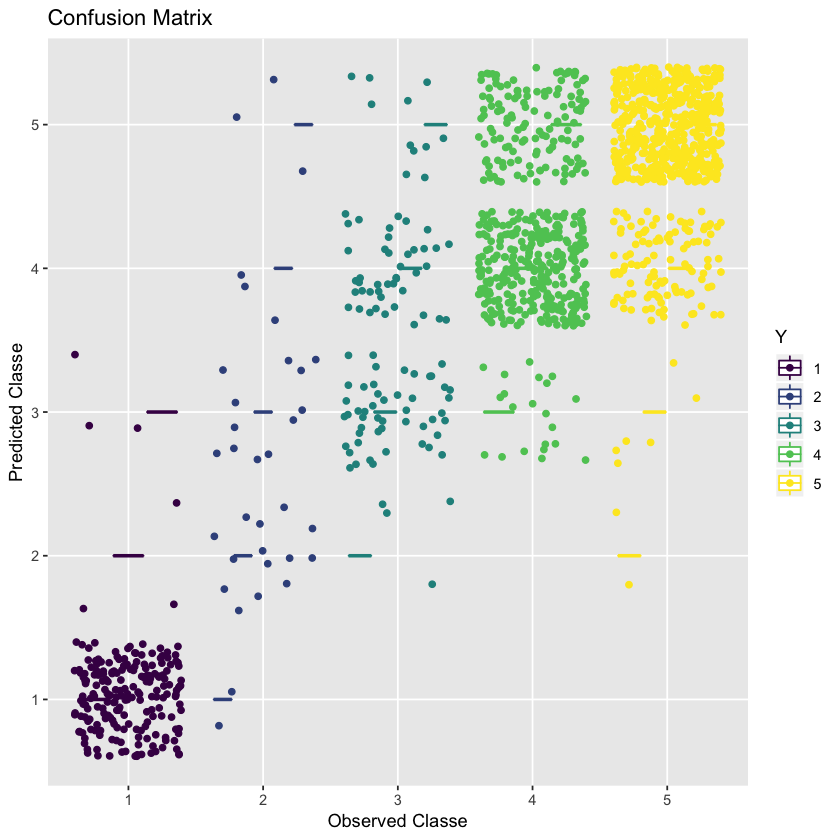

In [8]:
qplot(Y, pred, data=cls_1_test,  colour=Y,
      geom = c("boxplot", "jitter"), 
      main = "Confusion Matrix",
      xlab = "Observed Classe", ylab = "Predicted Classe")

## min_depth_distribution

- randomforest를 이루는 개별 tree들의 최소깊이 분포를 보여줌 

- 수치 : minimal depth의 평균 

- X축: 0에서부터  split에 사용된 최대 트리 수 

- Y축 : 변수

- 수치가 작을수록 높은 노드(root node)의 split에 사용됨  == 중요한 변수 

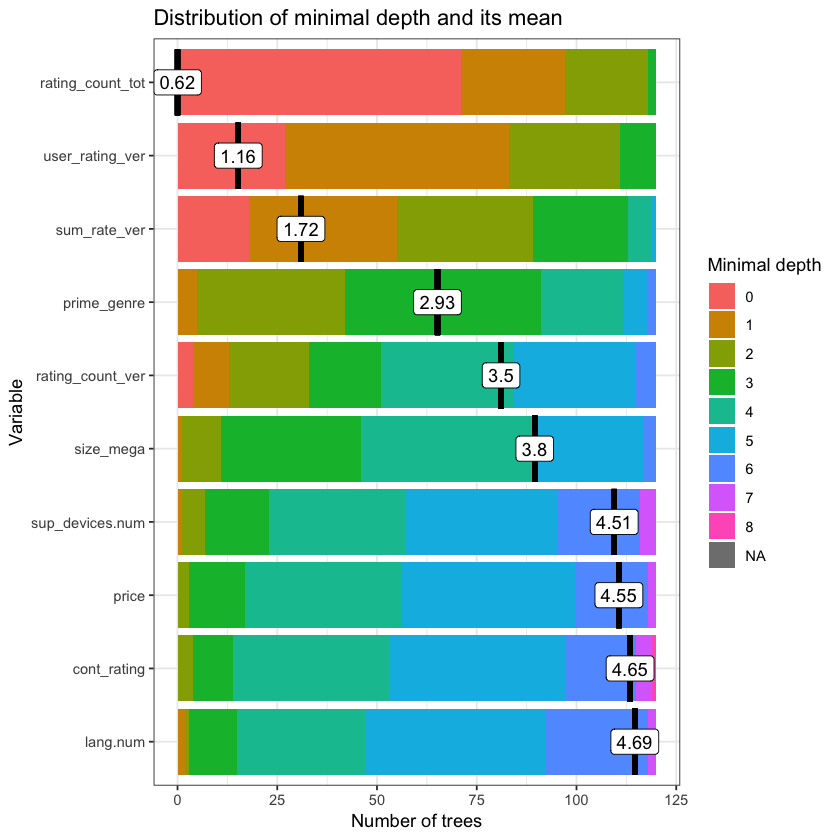

In [10]:
#min_depth_frame <- min_depth_distribution(tune_model1.fit)
#save(min_depth_frame, file = "min_depth_frame.rda")
#load("min_depth_frame.rda")
#head(min_depth_frame, n = 10)
plot_min_depth_distribution(min_depth_frame)

## 다양한 Importance 측정 방법

- varialbe : 변수

- mean_min_depth : minimal_depth의 평균

- no_of_nodes : split에 사용된 node 누적횟수

- accuracy_decrease : 해당 변수가 제외된 경우 accuracy decrease

- gini_decrease : 해당 변수로 split하였을 때, node impurity의 Gini index의 감소량

- no_of_trees: tree 수

- times_a_root : root node로 사용된 횟수

- [details](https://cran.rstudio.com/web/packages/randomForestExplainer/vignettes/randomForestExplainer.html)

In [11]:
### importance_frame
#importance_frame <- measure_importance(tune_model1.fit)
#save(importance_frame, file = "importance_frame.rda")
load("importance_frame.rda")
importance_frame

variable,mean_min_depth,no_of_nodes,accuracy_decrease,gini_decrease,no_of_trees,times_a_root,p_value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cont_rating,4.6500000,4923,0.003267085,100.16977,120,0,1.000000e+00
ipadSc_urls.num,4.8333333,5431,0.004901186,94.03817,120,0,1.000000e+00
lang.num,4.6916667,9428,0.002684212,170.24667,120,0,1.213646e-02
price,4.5500000,7268,0.003110309,130.60498,120,0,1.000000e+00
prime_genre,2.9333333,5846,0.010704218,148.87615,120,0,1.000000e+00
rating_count_tot,0.6166667,21169,0.183066161,1226.98018,120,71,0.000000e+00
rating_count_ver,3.5000000,10654,0.041457195,238.88025,120,4,8.049092e-53
size_mega,3.8000000,20949,0.005423938,400.65406,120,0,0.000000e+00
sum_rate_ver,1.7166667,11454,0.081502258,390.06522,120,18,2.682740e-122


# Multi-way importance plot


### 1. by times_a_root & mean_min_depth

- 음의 상관관계 (times_a_root, mean_min_depth)

- rating_count_tot 독보적 

- 원의 크기: no_of_nodes

- rating_count_tot, user_rating_ver, sum_rate_ver, rating_count_ver은 상위

- prime_genre와 size_mega도 유의하다고 판단


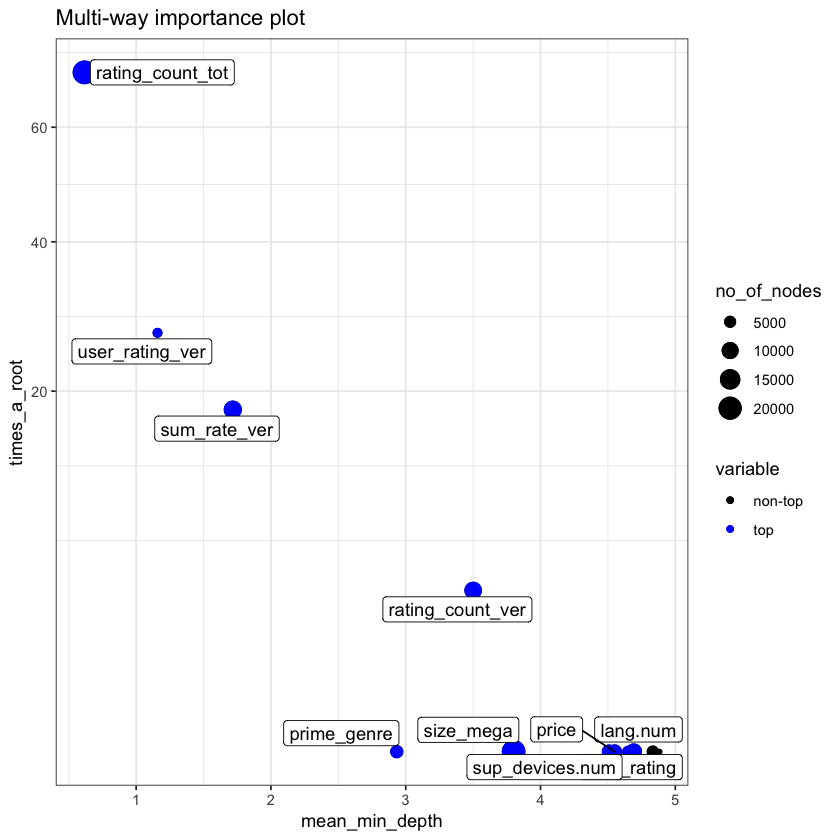

In [21]:
# plot_multi_way_importance(forest, size_measure = "no_of_nodes") # gives the same result as below but takes longer
plot_multi_way_importance(importance_frame, size_measure = "no_of_nodes")

## 2. by gini_decrease and accuracy_decrease

- 양의 상관관계(gini_decrease , accuracy_decrease)

- size_mega 

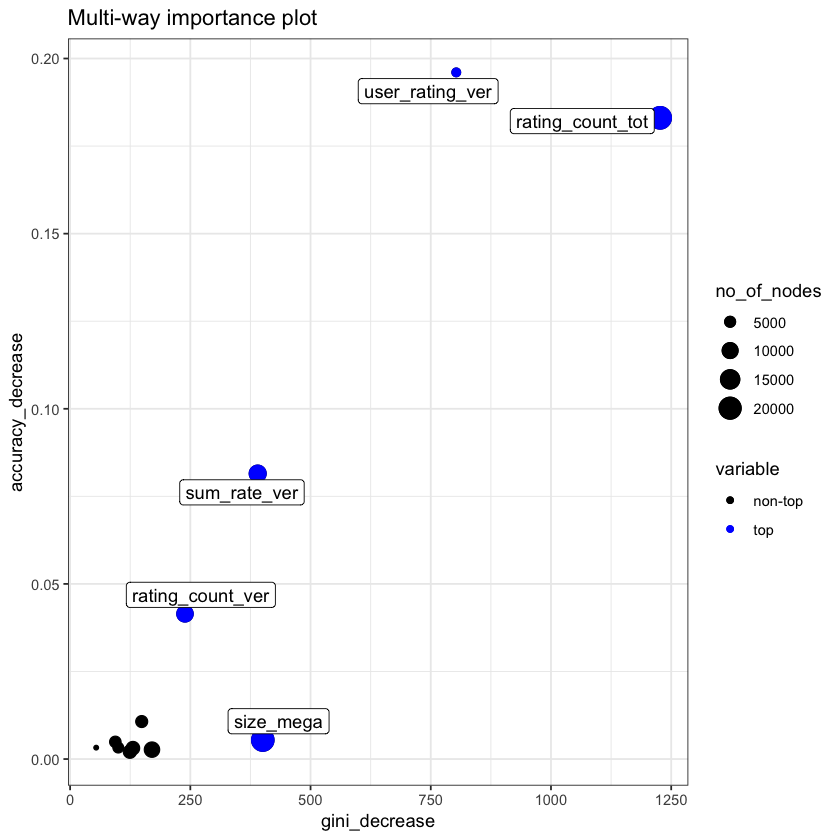

In [23]:
plot_multi_way_importance(importance_frame, x_measure = "gini_decrease",
                          y_measure = "accuracy_decrease",
                          size_measure = "no_of_nodes", no_of_labels = 5)

## 3. by gini_decrease and accuracy_decrease with p-value

- 양의 상관관계(gini_decrease , accuracy_decrease)

- p_value 관점에서 user_rating_ver은 유의하지 않음

- size_mega는 유의함

Warning message:
“Using alpha for a discrete variable is not advised.”

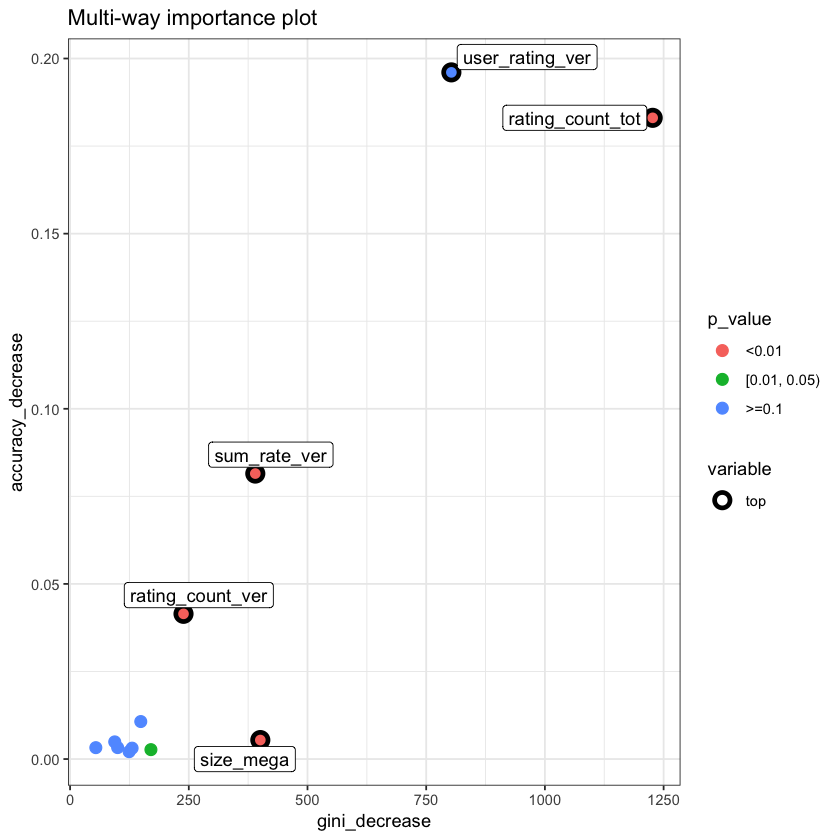

In [24]:
plot_multi_way_importance(importance_frame, x_measure = "gini_decrease",
                          y_measure = "accuracy_decrease",
                          size_measure = "p_value", no_of_labels = 5)

## Result

- user_rating을 predict하는 task

- 중요 변수 :

      rating_count_tot
      sum_rate_ver
      rating_count_ver
      size_mega
      
- 부가 변수 :
      
      prime_genre
      user_rating_ver


# 기타 참고자료
## prime_genre & user_rating

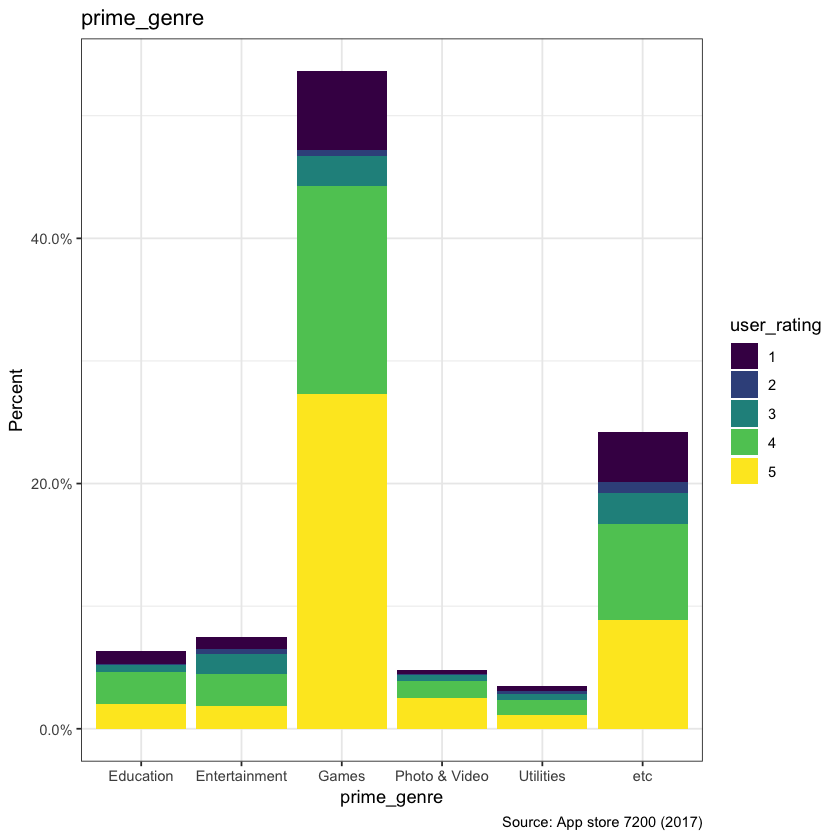

In [18]:
###########################################################################

ggplot(cls_3_train, aes(x = factor(prime_genre),
                      fill = factor(user_rating))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) +
  scale_y_continuous(labels=percent_format()) +
  theme_bw()+
  labs(title="prime_genre", 
       
       caption="Source: App store 7200 (2017)",
       x="prime_genre",y = 'Percent',
       fill="user_rating")

## size_mega  & user_rating

Warning message:
“Removed 190 rows containing non-finite values (stat_density).”

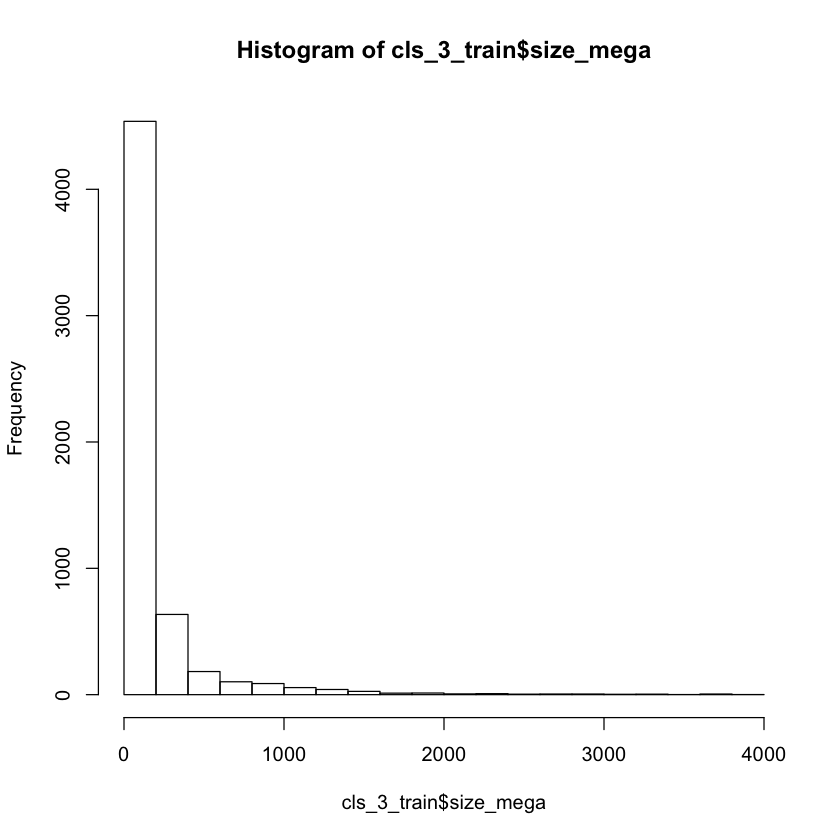

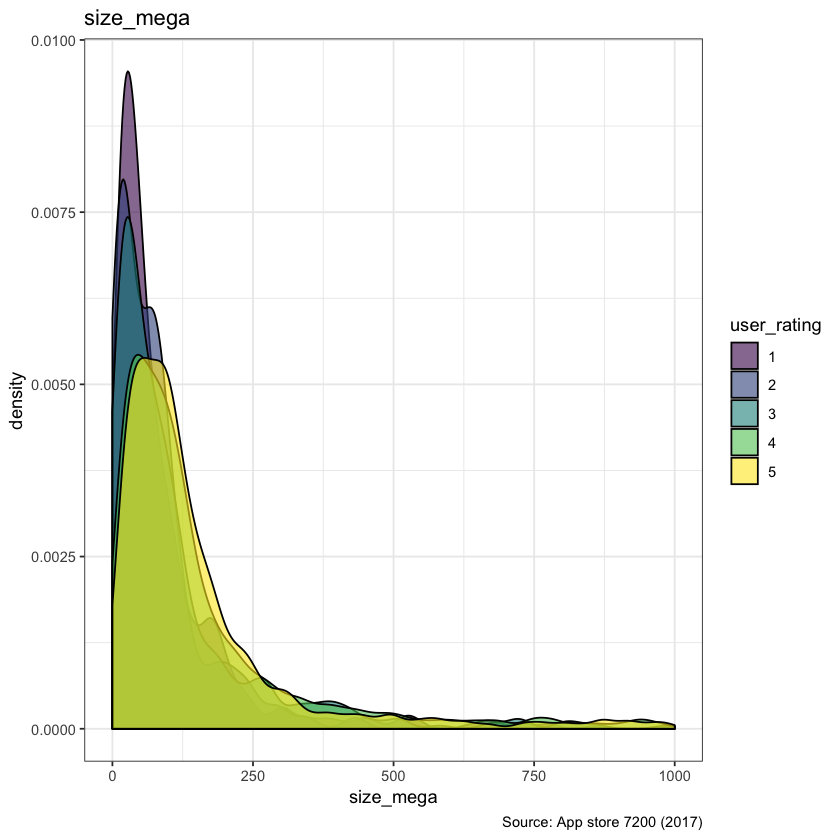

In [19]:
hist(cls_3_train$size_mega)

#install.packages("mcca")
g <- ggplot(cls_3_train)
g + geom_density(aes(x=size_mega,
                     fill=factor(user_rating)), alpha=0.6) + 
    xlim(0,1000)+
    theme_bw()+
  labs(title="size_mega", 
       caption="Source: App store 7200 (2017)",
       x="size_mega",y = 'density',
       fill="user_rating")